In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew


In [3]:
df = pd.read_csv("datos/bikes_stand.csv", index_col=0)
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,2018-01-01,winter,0,1,1,Monday,0,2,-0.486274,0.855582,-0.208909,654
1,2018-01-02,winter,0,1,0,Tuesday,1,2,-0.425690,0.332722,0.687550,670
2,2018-01-03,winter,0,1,0,Wednesday,1,1,-0.949970,-0.900337,0.685210,1229
3,2018-01-04,winter,0,1,0,Thursday,1,1,-0.938563,-0.170632,-0.210435,1454
4,2018-01-05,winter,0,1,0,Friday,1,1,-0.853992,-0.901843,0.060294,1518


In [4]:
lista_categoricas = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

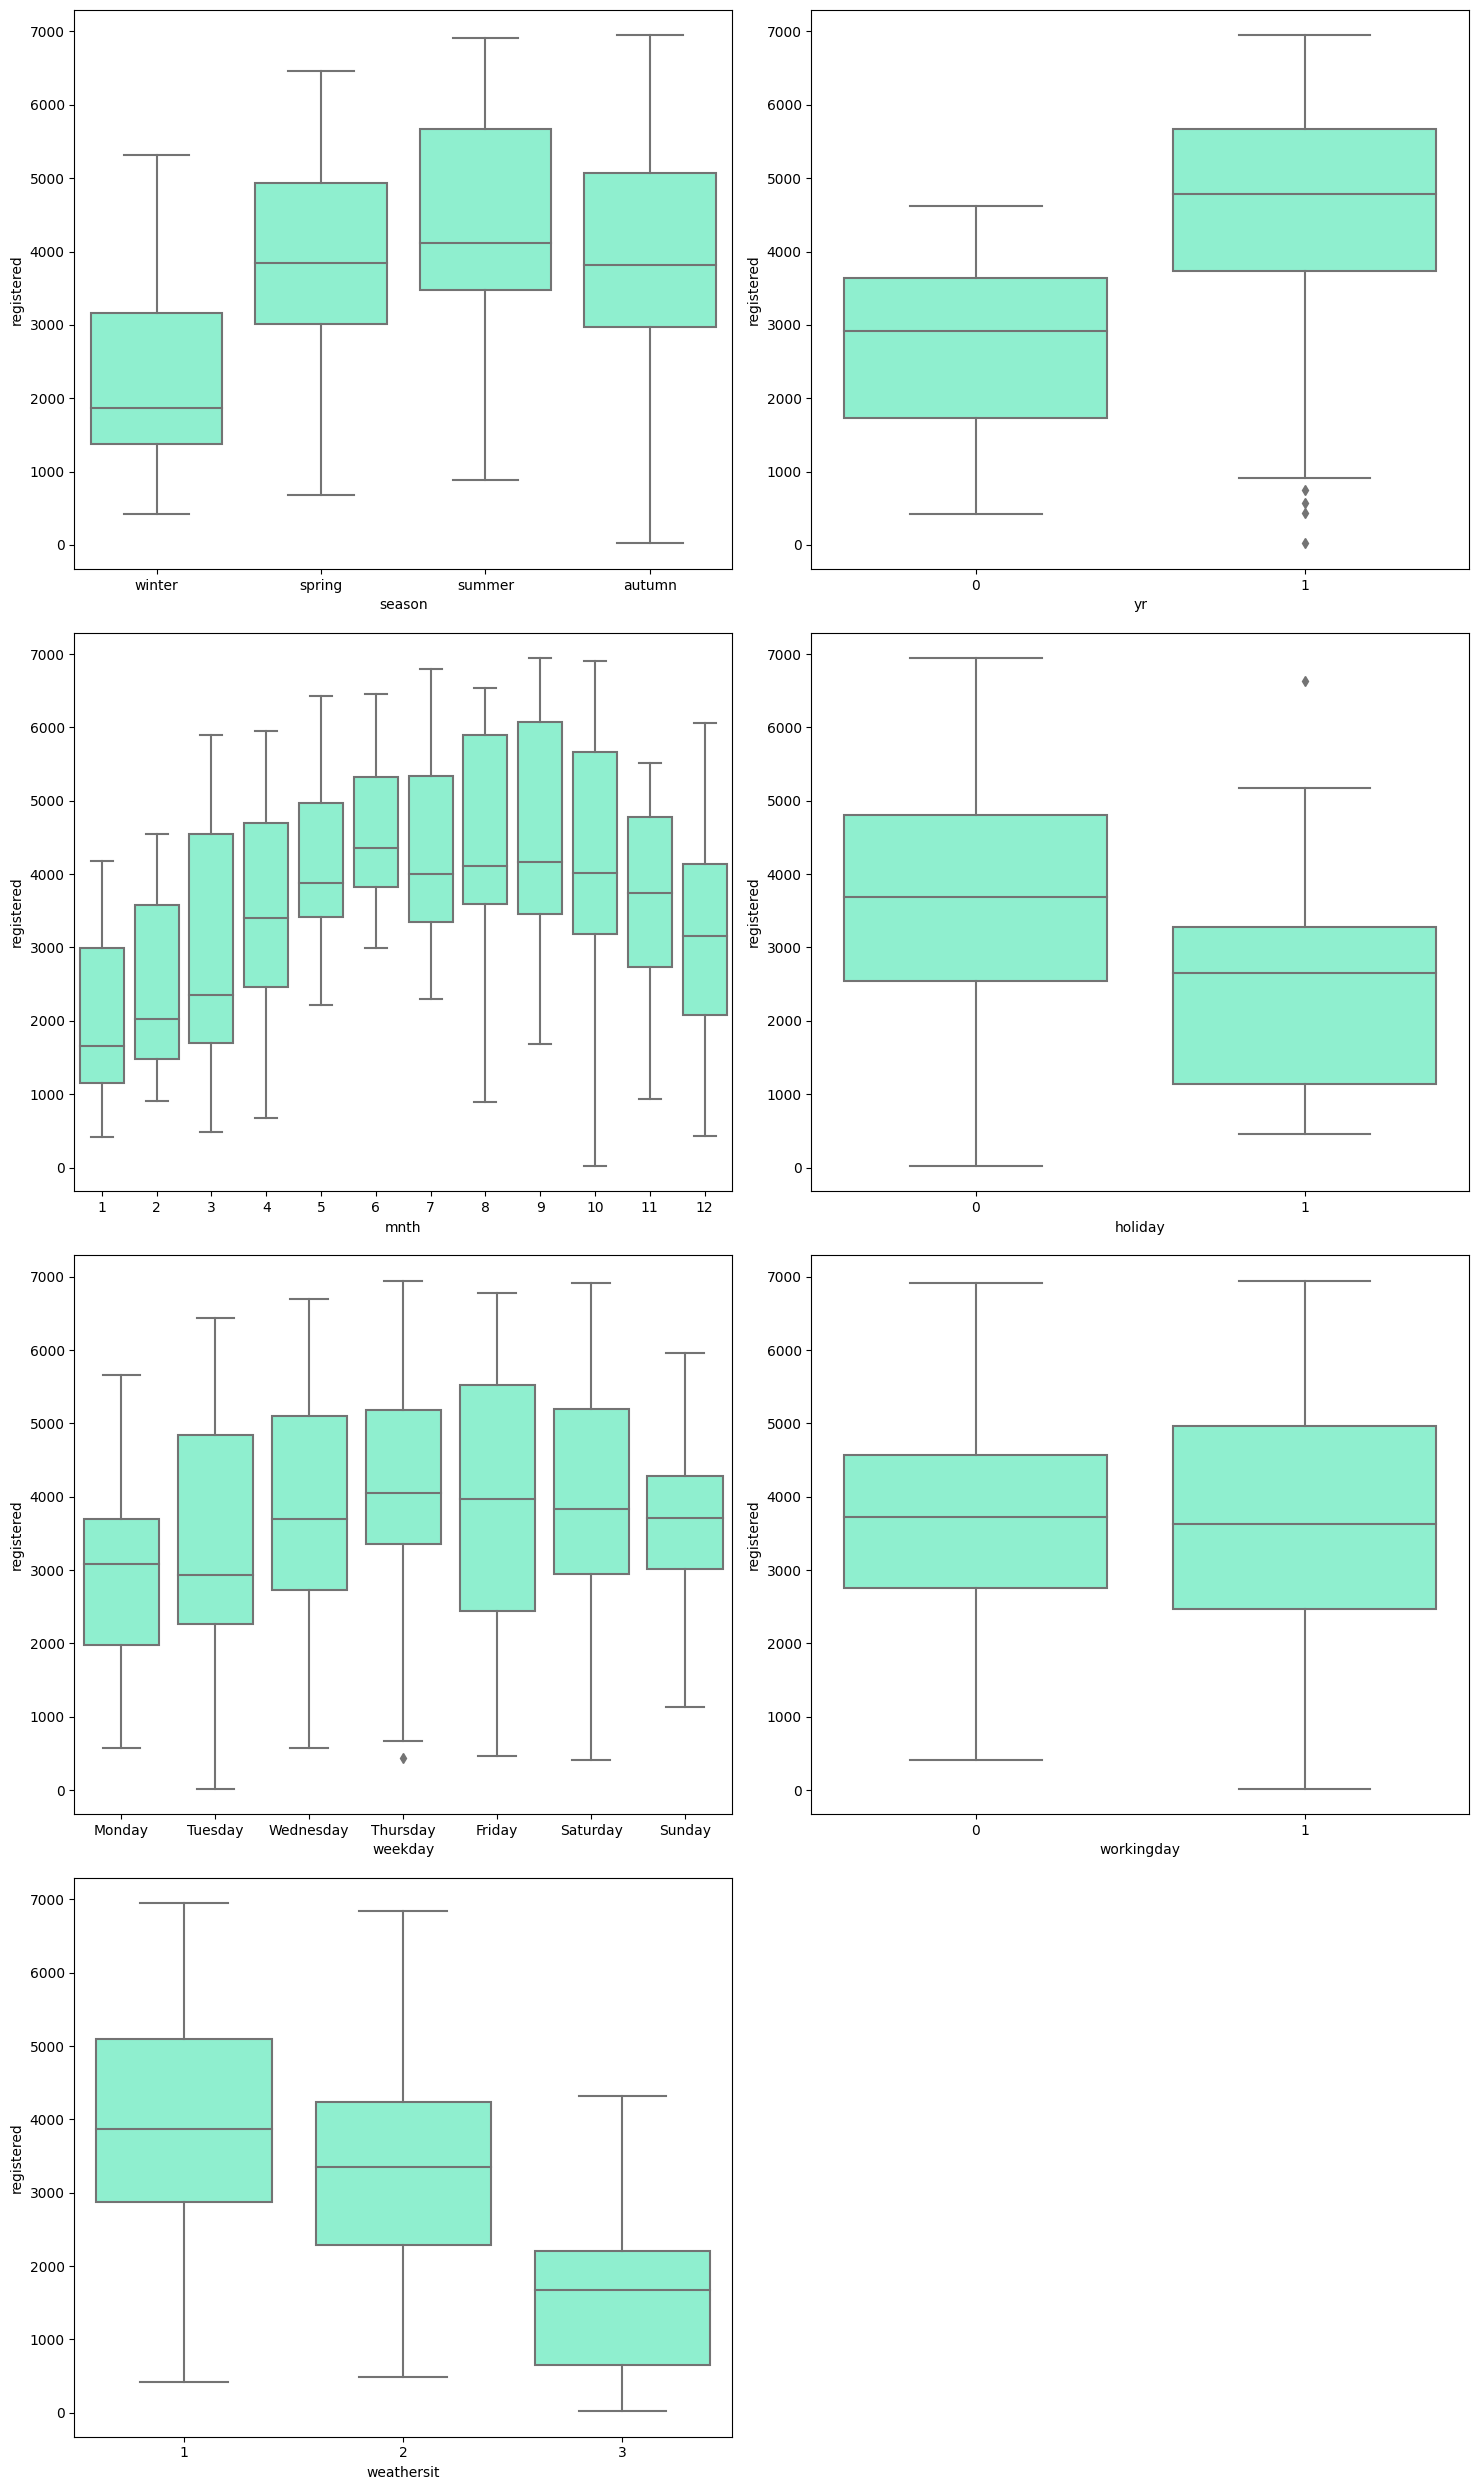

In [5]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_categoricas):
    sns.boxplot(x = columna, y = 'registered' , data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

# Empezamos el encoding

In [6]:
df.groupby("season")["registered"].median()

season
autumn    3815.0
spring    3844.0
summer    4110.5
winter    1869.0
Name: registered, dtype: float64

- ponemos el siguiente encoding:
 - winter:1
 - autumn: 2
 - spring:2
  - summer:2
 

In [7]:
df["season_encoding"] = df["season"].map({"winter": 1, "autumn": 2, "spring": 2, "summer": 2})

In [8]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,season_encoding
0,2018-01-01,winter,0,1,1,Monday,0,2,-0.486274,0.855582,-0.208909,654,1
1,2018-01-02,winter,0,1,0,Tuesday,1,2,-0.425690,0.332722,0.687550,670,1


- ponemos el siguiente encoding en la columna "yr":
 - 
